In [6]:
from xcube.core.dsio import open_cube
from xcube.core.resampling import resample_in_time
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.extract import get_cube_values_for_points

import IPython.display

import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr

xr.set_options(display_style="html")

import warnings
warnings.filterwarnings("ignore")

---

#### Index

This notebook contains four examples:

1. Inspect the CHL in the cube
2. Create monthly CHL aggregations for specific regions
3. Compute monthly CHL "anomalies" 
4. Compare Cube CHL with In-Situ CHL


#### Installation

For creating an `xcube` Python environment and installing `xcube` follow the instructions given in the [xcube's README](https://github.com/dcs4cop/xcube/blob/master/README.md).

Before using Jupyter Lab for the first time install the `jupyterlab` package and make sure the 
[Jupyter GeoJSON extension](https://www.npmjs.com/package/@jupyterlab/geojson-extension) is installed too:

```bash
(xcube) conda install -c conda-forge jupyterlab
(xcube) jupyter labextension install @jupyterlab/geojson-extension
```


---

## Inspect the CHL in the cube

Open demo data cube with CHL, TSM, and Turbidity for 2017:

In [7]:
cube = open_cube('https://s3.eu-central-1.amazonaws.com/xcube-examples/bc-olci-sns-l2c-2017_1x1024x1024.zarr', s3_kwargs=dict(anon=True) )
cube

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 5632, lon: 10240, time: 1479)
Coordinates:
  * lat             (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon             (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 2017-01-01T09:57:21.976999680 ... 2...
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(1479, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/32)
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

Extract a time-series at a point of interes, drop missing values:

In [8]:
chl_ts = cube.chl_c2rcc.sel(lat=53.890319, lon=6.693590, method='nearest').dropna(dim='time').load()
chl_ts

<xarray.DataArray 'chl_c2rcc' (time: 40)>
array([ 1.1714654 ,  1.31338298,  2.90247083,  3.04976106,  1.51151323,
        1.50580275,  1.23860836,  4.93053913,  3.87472653,  1.97678614,
        9.30374718,  1.12594032,  5.8912015 ,  5.38629723,  4.17079496,
        3.69425964,  3.04272556,  0.27716073,  0.34839118,  1.02374256,
        0.4744463 ,  0.72768992,  0.37006989,  1.10386074,  0.42149568,
       38.96497726,  0.61831409,  0.7054981 ,  0.42936969,  1.27544093,
        0.62599999,  0.64168257,  0.86150241,  0.48127368,  0.48386189,
        0.37900278,  0.92413759,  1.57427979,  2.40683126,  0.30077615])
Coordinates:
    lat      float64 53.89
    lon      float64 6.694
  * time     (time) datetime64[ns] 2017-02-15T10:29:41.692000256 ... 2017-09-...
Attributes:
    color_table_blue_values:    [128, 255, 255, 255, 255, 0, 0, 0, 0, 0]
    color_table_green_values:   [0, 0, 102, 204, 255, 128, 255, 95, 0, 0]
    color_table_red_values:     [0, 0, 51, 0, 0, 0, 255, 255, 215, 150]
    color_table_sample_values:  [0.0, 0.5, 1.0, 2.0, 3.0, 4.5, 13.0, 25.0, 30...
    long_name:                  Chlorophylll concentration
    original_name:              conc_chl
    sample_frequencies:         [5653, 1366, 704, 637, 485, 620, 493, 378, 29...
    spatial_resampling:         Nearest
    statistics:                 [0.016437947750091553, 109.5191650390625, 3.7...
    units:                      mg m^-3
    valid_pixel_expression:     valid_mask_c2rcc

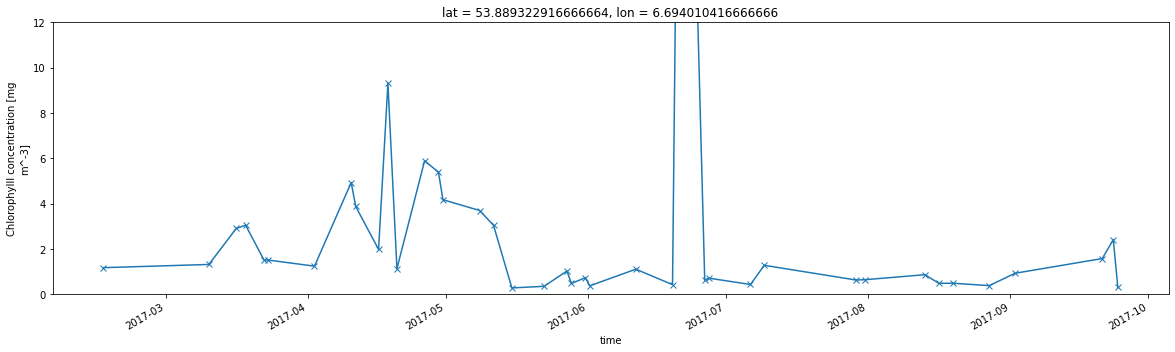

In [9]:
chl_ts.plot.line(marker='x', figsize=(20, 5), ylim=(0, 12))

In [10]:
chl_ts.time

<xarray.DataArray 'time' (time: 40)>
array(['2017-02-15T10:29:41.692000256', '2017-03-10T10:34:27.893000192',
       '2017-03-16T09:39:30.670000128', '2017-03-18T10:25:59.031000064',
       '2017-03-22T10:23:42.891000064', '2017-03-23T09:57:23.911000064',
       '2017-04-02T10:37:20.004000000', '2017-04-10T10:31:29.265999872',
       '2017-04-11T10:03:21.111000064', '2017-04-16T09:35:26.192000000',
       '2017-04-18T10:24:02.340000000', '2017-04-20T09:31:42.156000000',
       '2017-04-26T10:16:34.352999936', '2017-04-29T10:38:56.094000128',
       '2017-04-30T10:12:51.194000128', '2017-05-08T10:05:24.343000064',
       '2017-05-11T10:27:49.249999872', '2017-05-15T10:24:06.260000000',
       '2017-05-22T10:42:44.212999936', '2017-05-27T10:12:55.256999936',
       '2017-05-28T09:46:46.216000000', '2017-05-31T10:09:11.112000000',
       '2017-06-01T09:43:01.190000128', '2017-06-11T10:24:07.256999936',
       '2017-06-19T10:16:39.193999872', '2017-06-21T09:24:18.198000128',
       '2017-06-26T10:35:17.089999872', '2017-06-27T10:09:10.241999872',
       '2017-07-06T09:35:30.111000064', '2017-07-09T09:57:56.212999936',
       '2017-07-29T09:39:13.110000128', '2017-07-31T10:27:47.115000064',
       '2017-08-13T09:50:25.256000000', '2017-08-16T10:12:50.212000000',
       '2017-08-19T10:35:12.175999744', '2017-08-27T10:27:44.174000128',
       '2017-09-02T00:31:39.191999744', '2017-09-21T00:39:01.975000064',
       '2017-09-23T10:25:59.651000064', '2017-09-24T10:01:50.916999936'],
      dtype='datetime64[ns]')
Coordinates:
    lat      float64 53.89
    lon      float64 6.694
  * time     (time) datetime64[ns] 2017-02-15T10:29:41.692000256 ... 2017-09-...
Attributes:
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

Plot the image at one of the times filtered out above:

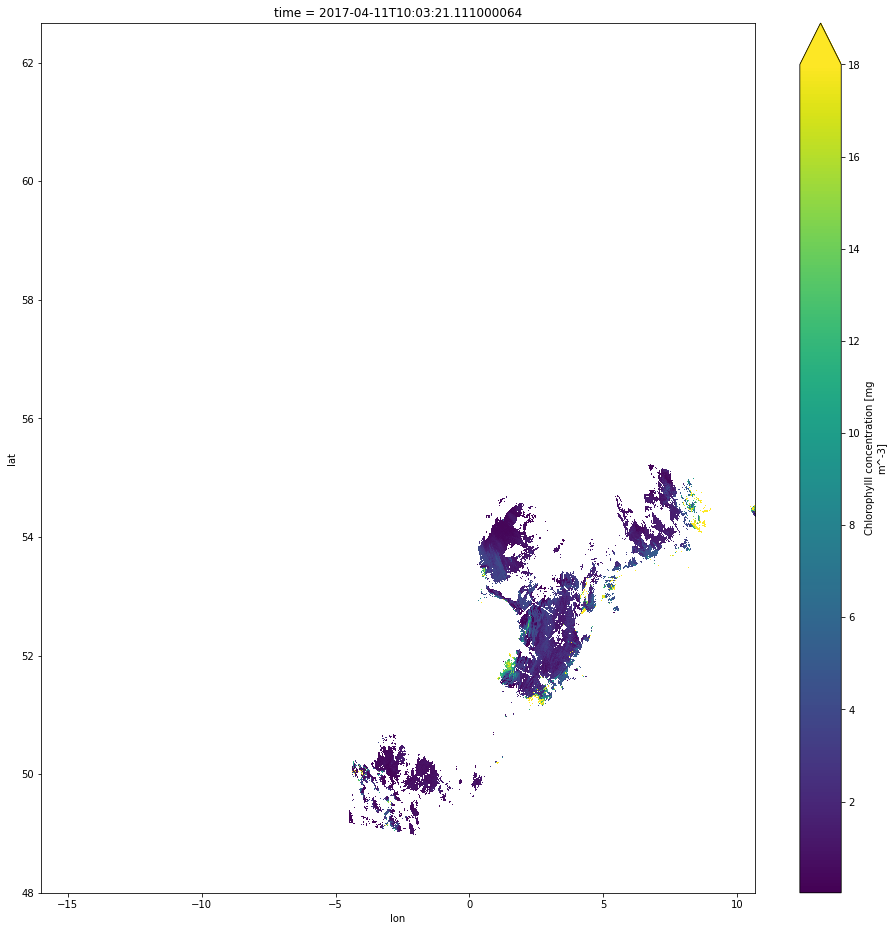

In [11]:
cube.chl_c2rcc.sel(time=np.datetime64('2017-04-11 10:00'), method='nearest').plot.imshow(vmax=18, figsize=(16, 16))


---

## Create monthly CHL aggregations for specific regions

Read Shapefile with Northsea regions according to Water Framework Directive (WFD):

In [12]:
regions = gpd.read_file('WRRL_Klassen_Nordsee/WRRL_Klassen_Nordsee_latlon3.shp')
regions

,TEMPLATE,EU_CD_CW,NAME,MS_CD_CW,CHAR_TYPE,TY_CW_CD,TY_NA_CW,INS_WHEN,INS_BY,STATUS_YR,...,RISK_ECST,RISK_DATE,AREA,PERIMETER,HECTARES,KM2,Anz_Sand,Anz_Misch,Anz_Schlic,geometry
0,Cwbody,DE_CW_N2_4900_01,Wattenmeer Jadebusen und angrenzende Küstenabs...,N2_4900_01,B,NEA2,Euhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.043428e+08,151288.473,40434.284,404,0,0,0,"POLYGON ((7.99698 53.77217, 7.99705 53.77184, ..."
1,Cwbody,DE_CW_N4_4900_01,Westliches Wattenmeer der Weser,N4_4900_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,6.855388e+07,41317.935,6855.388,69,40341,13562,1641,"POLYGON ((8.16075 53.72308, 8.16070 53.72312, ..."
2,Cwbody,DE_CW_N1_4900_01,Offenes Küstengewässer vor Jadebusen,N1_4900_01,B,NEA1,Euhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,1.715100e+08,61861.123,17151.002,172,10711,372,47,"POLYGON ((8.15294 53.73095, 8.14532 53.73051, ..."
3,Cwbody,DE_CW_N3_4900_01,Offenes Küstengewässer der Weser,N3_4900_01,B,NEA3,Polyhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,4.177503e+08,95859.775,41775.029,418,58207,3053,531,"POLYGON ((8.39376 53.90750, 8.38424 53.87770, ..."
4,Cwbody,DE_CW_N1_3100_01,Euhalines offenes Küstengewässer der Ems,N1_3100_01,B,NEA1,Euhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,2.727468e+08,211950.805,27274.677,273,0,0,0,"MULTIPOLYGON (((7.97073 53.77606, 7.97042 53.7..."
5,Cwbody,DE_CW_N4_4900_02,Östliches Wattenmeer der Weser,N4_4900_02,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,2.258952e+08,67440.138,22589.521,226,105158,47891,13176,"POLYGON ((8.41152 53.69452, 8.40708 53.69966, ..."
6,Cwbody,DE_CW_NO.3900_01,Küstenmeer Ems,NO.3900_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,1.825506e+09,220270.200,182550.589,1826,0,0,0,"POLYGON ((7.88315 53.83487, 7.86883 53.83012, ..."
7,Cwbody,DE_CW_NO.4000_01,Küstenmeer Weser,NO.4000_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,2.929415e+08,84389.209,29294.154,293,0,0,0,"POLYGON ((8.05633 53.89214, 7.88337 53.83495, ..."
8,Cwbody,DE_CW_N4_3990_01,Ems Wattenmeer,N4_3990_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.110000e-01,80.932,0.000,0,0,0,0,"POLYGON ((6.90308 53.44542, 6.90334 53.44509, ..."
9,Cwbody,DE_CW_N4_3100_01,Polyhalines Wattenmeer der Ems,N4_3100_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.859628e+08,172900.649,48596.278,486,211545,97316,13319,"POLYGON ((6.71775 53.56558, 6.71792 53.56660, ..."


In [13]:
IPython.display.GeoJSON(regions.__geo_interface__)

<IPython.display.GeoJSON object>

The remaining steps can be done in a loop over all regions. However, for this demonstration we just pick a single random region:

In [14]:
# region = regions.loc[regions['NAME'] == 'Küstenmeer Elbe']
# region = regions.loc[regions['NAME'] == 'Küstenmeer Eider']
region = regions.loc[regions['NAME'] == 'Küstenmeer Ems']
region

,TEMPLATE,EU_CD_CW,NAME,MS_CD_CW,CHAR_TYPE,TY_CW_CD,TY_NA_CW,INS_WHEN,INS_BY,STATUS_YR,...,RISK_ECST,RISK_DATE,AREA,PERIMETER,HECTARES,KM2,Anz_Sand,Anz_Misch,Anz_Schlic,geometry
6,Cwbody,DE_CW_NO.3900_01,Küstenmeer Ems,NO.3900_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,1.825506e+09,220270.2,182550.589,1826,0,0,0,"POLYGON ((7.88315 53.83487, 7.86883 53.83012, ..."


In [15]:
IPython.display.GeoJSON(region.__geo_interface__)

<IPython.display.GeoJSON object>

Note, this reagion is still a data frame, whose geometry is a one-element series. That's is how we get the actual geometry object: 

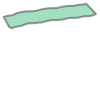

In [16]:
polygon = region.geometry.values[0]
polygon

We'll now narrow down the data cube to that selected region and mask out all values that don't intersect with the region polygon:

In [17]:
cube_masked = mask_dataset_by_geometry(cube, polygon)
cube_masked

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 146, lon: 546, time: 1479)
Coordinates:
  * lat             (lat) float64 54.0 53.99 53.99 53.99 ... 53.62 53.62 53.62
  * lon             (lon) float64 6.465 6.467 6.47 6.473 ... 7.879 7.882 7.884
  * time            (time) datetime64[ns] 2017-01-01T09:57:21.976999680 ... 2...
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(146, 2), meta=np.ndarray>
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(546, 2), meta=np.ndarray>
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(1479, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
Attributes: (12/32)
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

Next, we resample the masked and clipped cube to monthly averages:

In [18]:
cube_1m = resample_in_time(cube_masked, frequency='1M', method='mean')
cube_1m

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 146, lon: 546, time: 13)
Coordinates:
  * time                 (time) datetime64[ns] 2016-12-31 ... 2017-12-31
  * lat                  (lat) float64 54.0 53.99 53.99 ... 53.62 53.62 53.62
  * lon                  (lon) float64 6.465 6.467 6.47 ... 7.879 7.882 7.884
    lat_bnds             (lat, bnds) float64 dask.array<chunksize=(146, 2), meta=np.ndarray>
    lon_bnds             (lon, bnds) float64 dask.array<chunksize=(546, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tsm_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tur_nechad_665_mean  (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
Attributes: (12/34)
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube
    time_coverage_start:        <xarray.DataArray 'time' ()>\narray('2017-01-...
    time_coverage_end:          <xarray.DataArray 'time' ()>\narray('2017-12-...

In [19]:
cube_1m.time

<xarray.DataArray 'time' (time: 13)>
array(['2016-12-31T00:00:00.000000000', '2017-01-31T00:00:00.000000000',
       '2017-02-28T00:00:00.000000000', '2017-03-31T00:00:00.000000000',
       '2017-04-30T00:00:00.000000000', '2017-05-31T00:00:00.000000000',
       '2017-06-30T00:00:00.000000000', '2017-07-31T00:00:00.000000000',
       '2017-08-31T00:00:00.000000000', '2017-09-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-31 2017-01-31 ... 2017-12-31

We will frequently use the data `cube_1m` in the following steps, so that we benefit if we load them all into memory:

In [20]:
cube_1m = cube_1m.load()

We are going to work with the CHL values only, therefore:

In [21]:
chl = cube_1m.chl_c2rcc_mean

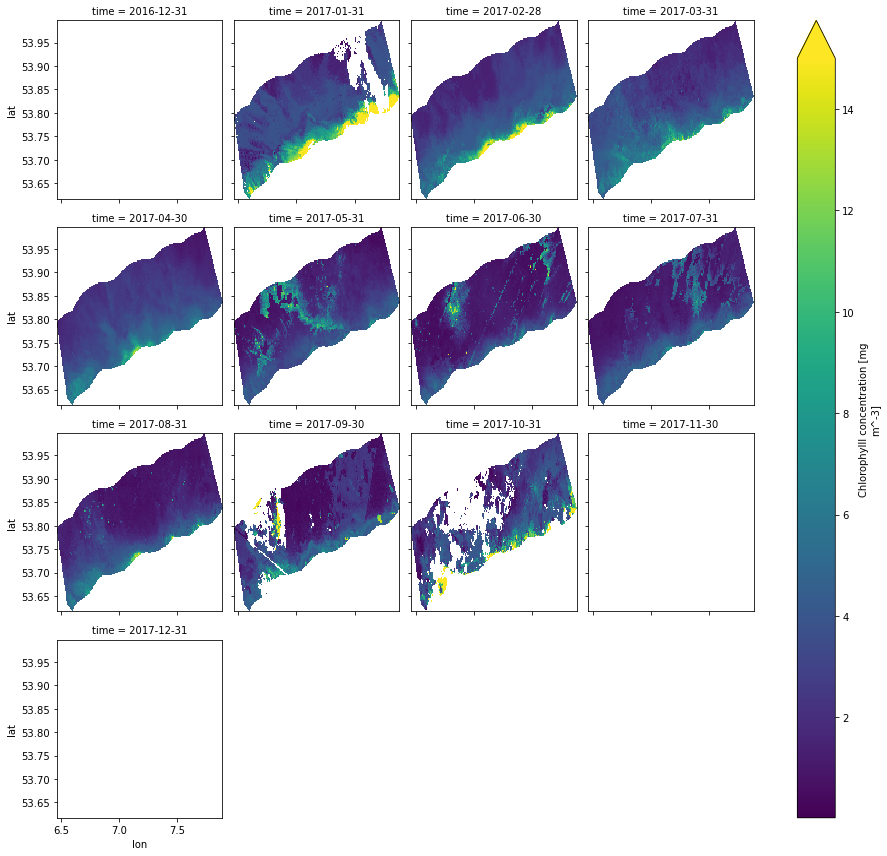

In [22]:
chl.plot.imshow(col='time', col_wrap=4, vmax=15)

Now we can compute time series of the mean, median and the p90 values:

In [23]:
chl_mean = chl.mean(dim=['lat', 'lon'])
chl_p50 = chl.median(dim=['lat', 'lon'])
chl_p90 = chl.quantile(0.9, dim=['lat', 'lon'])

In [24]:
chl_ts_ds = xr.Dataset(dict(chl_mean=chl_mean, chl_p50=chl_p50, chl_p90=chl_p90))
chl_ts_df = chl_ts_ds.to_dataframe().drop('quantile', axis=1)
chl_ts_df

,chl_mean,chl_p50,chl_p90
time,,,
2016-12-31,NaN,NaN,NaN
2017-01-31,4.547736,3.609405,9.218224
2017-02-28,3.638575,3.166796,5.873994
2017-03-31,3.674974,3.423619,5.903209
2017-04-30,3.262771,2.890220,5.164213
2017-05-31,2.833770,2.226355,5.466666
2017-06-30,1.991946,1.211070,4.383509
2017-07-31,2.326900,1.612868,4.596536
2017-08-31,2.281199,1.643400,4.686294


<AxesSubplot:xlabel='time'>

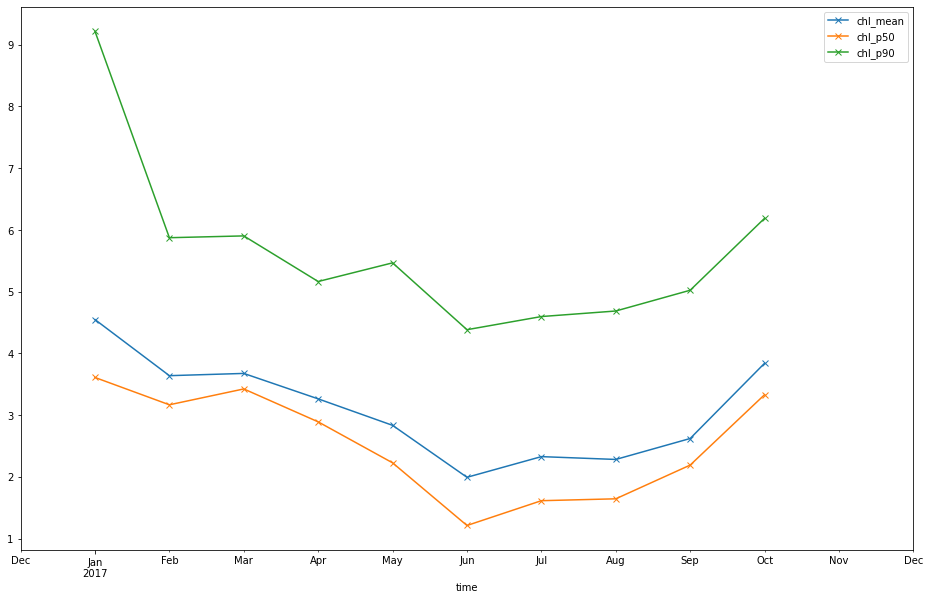

In [25]:
chl_ts_df.plot.line(figsize=(16,10), marker='x')

---

## Compute monthly CHL "anomalies" 

The following steps explain, how to compute the "anomaly" of every month for the selected region with respect to the mean of all months in 2017:

In [26]:
chl_mean = chl.mean(dim='time')
chl_mean

<xarray.DataArray 'chl_c2rcc_mean' (lat: 146, lon: 546)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 54.0 53.99 53.99 53.99 ... 53.63 53.62 53.62 53.62
  * lon      (lon) float64 6.465 6.467 6.47 6.473 ... 7.876 7.879 7.882 7.884

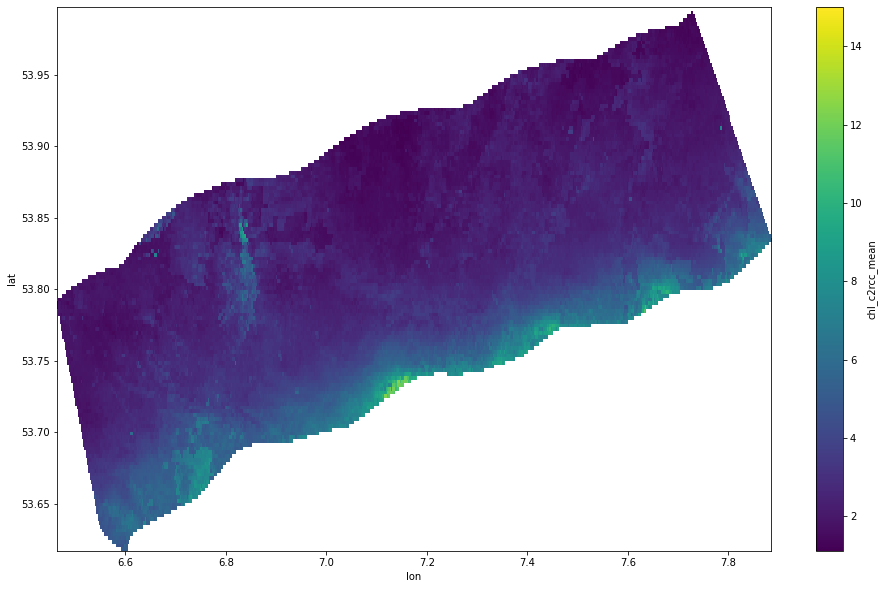

In [27]:
chl_mean.plot.imshow(vmax=15, figsize=(16,10))

In [28]:
chl_anomaly = chl - chl_mean

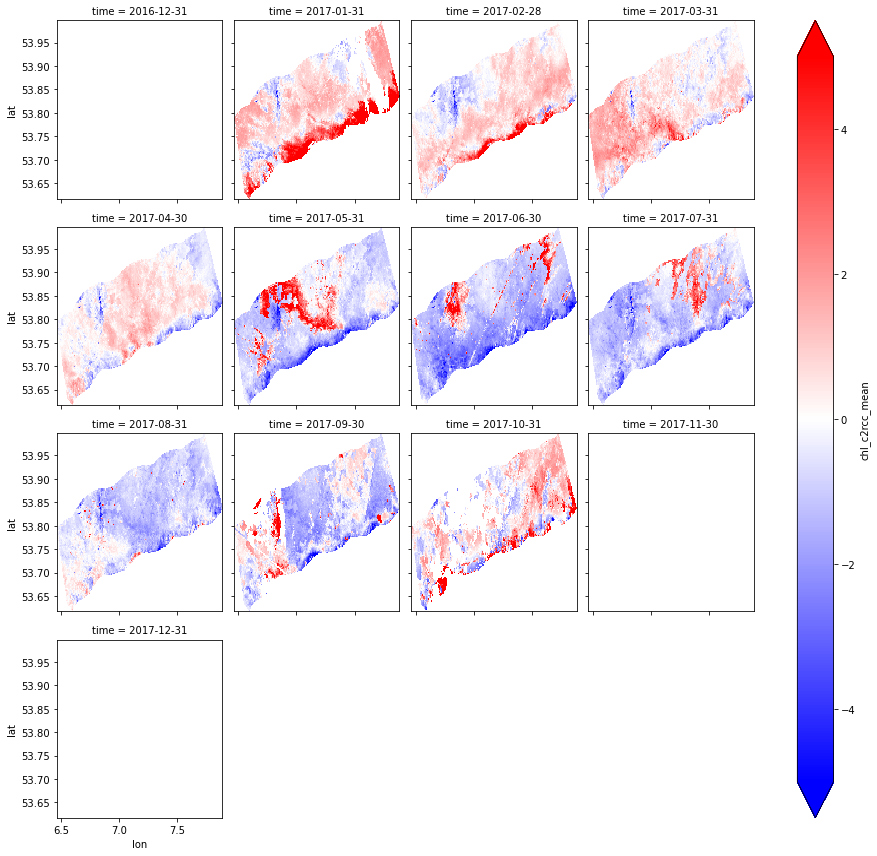

In [29]:
chl_anomaly.plot.imshow(col='time', col_wrap=4, cmap='bwr', vmin=-5, vmax=5)

---

## Compare Cube CHL with In-Situ CHL

The following analysis provided here represents a validation of the cube data with in-situ data.

Read some in-situ data points from a shiptrack made by BSH in Summer 2017: 

In [30]:
cruise = pd.read_csv('./summercruise_2017_positions_for_pixex.txt', delimiter='\t', converters={'DateTime': np.datetime64})
cruise

,Name,latitude,longitude,DateTime,Chlorophyll-a_Jeff_Humphr,Phaeophytin_Jeff_Humphr,Chlorophyll_ges,SD,TUR
0,GN003,54.001833,8.111167,2017-08-12 14:57:00,5.939,1.244,6.560,4.5,1.449
1,GN008,54.000167,4.830667,2017-08-13 05:03:00,1.319,0.274,1.456,3.5,0.185
2,GN009,54.000000,2.999500,2017-08-13 13:12:00,0.415,0.093,0.461,NaN,0.036
3,GN011,52.511333,4.325500,2017-08-14 05:10:00,7.216,1.444,7.938,12.0,0.061
4,GN012,51.998500,3.730000,2017-08-14 10:21:00,2.642,0.554,2.919,6.0,0.078
5,GN013,51.699500,2.857667,2017-08-14 14:03:00,1.715,0.360,1.895,5.5,0.121
6,GN014,52.006333,2.007833,2017-08-14 18:51:00,1.933,0.400,2.133,3.0,0.440
7,GN016,53.330500,1.671500,2017-08-15 05:23:00,0.666,0.140,0.736,11.0,0.050
8,GN017,54.000667,0.996333,2017-08-15 14:10:00,1.677,0.351,1.852,10.5,0.040
9,GN018,55.004500,-0.007333,2017-08-16 03:44:00,0.937,0.199,1.037,NaN,0.026


Since we want to compare the points with data in the cube, we need to match the names of coordinate variables first, so we rename the columns:

In [31]:
cruise = cruise.rename(columns={'longitude': 'lon', 'latitude': 'lat', 'DateTime': 'time'})
cruise['ID'] = np.arange(0, len(cruise))

Where are these points?

In [32]:
from shapely.geometry import Point
cruise_geom = gpd.GeoDataFrame(cruise.drop(['lon', 'lat'], axis=1), crs={'init': 'epsg:4326'}, geometry=[Point(xy) for xy in zip(cruise.lon, cruise.lat)])
IPython.display.GeoJSON(cruise_geom.__geo_interface__)

<IPython.display.GeoJSON object>

We now select that month from the cube (no need to do this, this is an optional step for demonstration only):

In [33]:
cube_subset = cube.sel(time='2017-08')
cube_subset

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 5632, lon: 10240, time: 136)
Coordinates:
  * lat             (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon             (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 2017-08-01T09:59:56.478000128 ... 2...
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(136, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/32)
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

We now resample that month to weekly averages in order to increase the probability that we find match-ups:

In [34]:
cube_1w = resample_in_time(cube_subset, frequency='1W', method='mean')
cube_1w

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 5632, lon: 10240, time: 5)
Coordinates:
  * time                 (time) datetime64[ns] 2017-07-30 ... 2017-08-27
  * lat                  (lat) float64 62.67 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds             (lat, bnds) float64 dask.array<chunksize=(1024, 2), meta=np.ndarray>
  * lon                  (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds             (lon, bnds) float64 dask.array<chunksize=(1024, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665_mean  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/34)
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    ...                         ...
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube
    time_coverage_start:        <xarray.DataArray 'time' ()>\narray('2017-08-...
    time_coverage_end:          <xarray.DataArray 'time' ()>\narray('2017-08-...

Next, we extract values from the data cube `cube_1w` for all the points in the `cruise`:

In [35]:
match_ups = get_cube_values_for_points(cube_1w, cruise, include_coords=True, include_indexes=True)
match_ups

<xarray.Dataset>
Dimensions:              (idx: 36)
Coordinates:
    time                 (idx) datetime64[ns] 2017-08-13 ... 2017-08-27
    lat                  (idx) float64 54.0 54.0 54.0 52.51 ... 59.0 59.0 59.0
    lon                  (idx) float64 8.111 4.829 2.999 ... 1.001 0.003906
Dimensions without coordinates: idx
Data variables:
    chl_c2rcc_mean       (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    tsm_c2rcc_mean       (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    tur_nechad_665_mean  (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    time_index           (idx) int64 2 2 2 2 2 2 2 2 2 2 ... 4 4 4 4 4 4 4 4 4 4
    lat_index            (idx) int64 3327 3327 3328 3899 ... 1023 1408 1407 1407
    lon_index            (idx) int64 9258 7998 7295 7804 ... 7872 7872 6528 6145

Here are the match-ups for CHL and TUR:

In [36]:
chl_match_ups = match_ups.chl_c2rcc_mean.values
tur_match_ups = match_ups.tur_nechad_665_mean.values

We add them to the cruise data:

In [37]:
cruise['chl_olci'] = chl_match_ups
cruise['tur_olci'] = tur_match_ups / 40
cruise

,Name,lat,lon,time,Chlorophyll-a_Jeff_Humphr,Phaeophytin_Jeff_Humphr,Chlorophyll_ges,SD,TUR,ID,chl_olci,tur_olci
0,GN003,54.001833,8.111167,2017-08-12 14:57:00,5.939,1.244,6.560,4.5,1.449,0,4.782143,0.160146
1,GN008,54.000167,4.830667,2017-08-13 05:03:00,1.319,0.274,1.456,3.5,0.185,1,NaN,NaN
2,GN009,54.000000,2.999500,2017-08-13 13:12:00,0.415,0.093,0.461,NaN,0.036,2,NaN,NaN
3,GN011,52.511333,4.325500,2017-08-14 05:10:00,7.216,1.444,7.938,12.0,0.061,3,NaN,NaN
4,GN012,51.998500,3.730000,2017-08-14 10:21:00,2.642,0.554,2.919,6.0,0.078,4,1.221753,0.131399
5,GN013,51.699500,2.857667,2017-08-14 14:03:00,1.715,0.360,1.895,5.5,0.121,5,NaN,NaN
6,GN014,52.006333,2.007833,2017-08-14 18:51:00,1.933,0.400,2.133,3.0,0.440,6,2.010603,0.408150
7,GN016,53.330500,1.671500,2017-08-15 05:23:00,0.666,0.140,0.736,11.0,0.050,7,0.947754,0.072791
8,GN017,54.000667,0.996333,2017-08-15 14:10:00,1.677,0.351,1.852,10.5,0.040,8,0.540131,0.045269
9,GN018,55.004500,-0.007333,2017-08-16 03:44:00,0.937,0.199,1.037,NaN,0.026,9,NaN,NaN


<AxesSubplot:xlabel='Chlorophyll_ges', ylabel='chl_olci'>

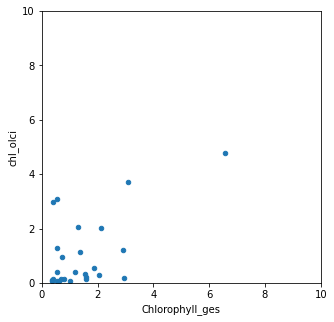

In [38]:
cruise.plot.scatter('Chlorophyll_ges', 'chl_olci', xlim=(0, 10), ylim=(0, 10), figsize=(5,5))

<AxesSubplot:xlabel='TUR', ylabel='tur_olci'>

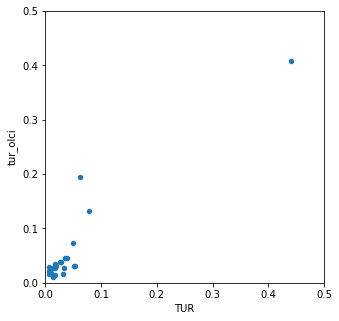

In [39]:
cruise.plot.scatter('TUR', 'tur_olci', xlim=(0, 0.5), ylim=(0, 0.5), figsize=(5,5))